In [1]:
import requests
import json
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

C:\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Thank you to http://www.learndatasci.com/sentiment-analysis-reddit-headlines-pythons-nltk/ for the tutorial!

In [76]:
def get_sentiment_word(subreddit, subreddit2, word):
    
    # First, let's get our data from Reddit
    
    header = {"User-Agent": "windows:r/" + subreddit + ".single.result:v1.0" + "(by /u/serenamcd)"}
    request = requests.get(url = "https://www.reddit.com/r/" + subreddit + ".json", headers = header)
    json_data = json.loads(request.text)
    posts = json.dumps(json_data["data"]["children"], indent = 4, sort_keys = True)
    data_all = json_data["data"]["children"]
    num_posts = 0
    while len(data_all) <= 1000:
        # Wait 2 seconds between requests so we don't violate Reddit's API terms.
        time.sleep(2)
        # get last entry, so that we get the url that comes after it, for each loop
        last = data_all[-1]["data"]["name"]
        url = "https://www.reddit.com/r/" + subreddit + "/.json?after=" + str(last)
        request = requests.get(url, headers = header)
        data = json.loads(request.text)
        data_all += data["data"]["children"]
        if num_posts == len(data_all):
            break
        else:
            num_posts = len(data_all)
            
    header2 = {"User-Agent": "windows:r/" + subreddit2 + ".single.result:v1.0" + "(by /u/serenamcd)"}
    request2 = requests.get(url = "https://www.reddit.com/r/" + subreddit2 + ".json", headers = header)
    json_data2 = json.loads(request2.text)
    posts2 = json.dumps(json_data2["data"]["children"], indent = 4, sort_keys = True)
    data_all2 = json_data2["data"]["children"]
    num_posts = 0
    while len(data_all2) <= 1000:
        # Wait 2 seconds between requests so we don't violate Reddit's API terms.
        time.sleep(2)
        # get last entry, so that we get the url that comes after it, for each loop
        last2 = data_all2[-1]["data"]["name"]
        url2 = "https://www.reddit.com/r/" + subreddit2 + "/.json?after=" + str(last)
        request2 = requests.get(url2, headers = header)
        data2 = json.loads(request2.text)
        data_all2 += data2["data"]["children"]
        if num_posts == len(data_all2):
            break
        else:
            num_posts = len(data_all2)            
          
    # Now we've got all our data, let's go on to do some analysis. 
    # We want to categorize it as positive or negative. 
    # We'll use Vader Sentiment Analyzer from NLTK for this, which will rank the text as positive, negative, or neutral. 
    # Vader is especially useful for social media applications.

    get_sentiment = SentimentIntensityAnalyzer()
    positive_list = []
    negative_list = []
    neutral_list = []
    
    write_name = subreddit + subreddit2 + word
    
    for post in (data_all + data_all2):
        
        current_header = post["data"]["title"]
    
        sentiment = get_sentiment.polarity_scores(current_header)
        
        if word in current_header:
    
            if sentiment["compound"] > 0.2:
                positive_list.append(current_header)
            elif sentiment["compound"] < -0.2:
                negative_list.append(current_header)
            else:
                neutral_list.append(current_header)
        
    with open("positive_" + write_name + "_titles.txt", "w", encoding = "utf-8", errors = "ignore") as f_positive:
        for post in positive_list:
            f_positive.write(post + "\n")
        
    with open("negative_" + write_name + "_titles.txt", "w", encoding = "utf-8", errors = "ignore") as f_negative:
        for post in negative_list:
            f_negative.write(post + "\n")
        
    with open("neutral_" + write_name + "_titles.txt", "w", encoding = "utf-8", errors = "ignore") as f_neutral:
        for post in neutral_list:
            f_neutral.write(post + "\n")
            
    # Plot results
    
    result_distribution = [len(positive_list), len(neutral_list), len(negative_list)]
    total_results = len(positive_list) + len(neutral_list) + len(negative_list)
    result_distribution = [(result*100)/total_results for result in result_distribution]
    
    sns.set_style("white")
    ax = sns.barplot(x = ["Positive", "Neutral", "Negative"], y = result_distribution, color = "blue")
    ax.set(xlabel="Sentiment", ylabel="Percentage")
    sns.despine(left = True, bottom = True)
    # show percentages on top of bar plot
    for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width()/2., height + 0.5, '{:1.2f} %'.format(height), ha = "center")
    ax.set_title("Distribution of Sentiments: r/" + subreddit + " and r/" + subreddit2)
    plt.show()
    
    print("Total headers containing " + word + ": " + str(total_results))

In [69]:
def get_sentiment_party(subreddit, subreddit2, party):
    
    # First, let's get our data from Reddit
    
    header = {"User-Agent": "windows:r/" + subreddit + ".single.result:v1.0" + "(by /u/serenamcd)"}
    request = requests.get(url = "https://www.reddit.com/r/" + subreddit + ".json", headers = header)
    json_data = json.loads(request.text)
    posts = json.dumps(json_data["data"]["children"], indent = 4, sort_keys = True)
    data_all = json_data["data"]["children"]
    num_posts = 0
    while len(data_all) <= 1000:
        # Wait 2 seconds between requests so we don't violate Reddit's API terms.
        time.sleep(2)
        # get last entry, so that we get the url that comes after it, for each loop
        last = data_all[-1]["data"]["name"]
        url = "https://www.reddit.com/r/" + subreddit + "/.json?after=" + str(last)
        request = requests.get(url, headers = header)
        data = json.loads(request.text)
        data_all += data["data"]["children"]
        if num_posts == len(data_all):
            break
        else:
            num_posts = len(data_all)
            
    header2 = {"User-Agent": "windows:r/" + subreddit2 + ".single.result:v1.0" + "(by /u/serenamcd)"}
    request2 = requests.get(url = "https://www.reddit.com/r/" + subreddit2 + ".json", headers = header)
    json_data2 = json.loads(request2.text)
    posts2 = json.dumps(json_data2["data"]["children"], indent = 4, sort_keys = True)
    data_all2 = json_data2["data"]["children"]
    num_posts = 0
    while len(data_all2) <= 1000:
        # Wait 2 seconds between requests so we don't violate Reddit's API terms.
        time.sleep(2)
        # get last entry, so that we get the url that comes after it, for each loop
        last2 = data_all2[-1]["data"]["name"]
        url2 = "https://www.reddit.com/r/" + subreddit2 + "/.json?after=" + str(last)
        request2 = requests.get(url2, headers = header)
        data2 = json.loads(request2.text)
        data_all2 += data2["data"]["children"]
        if num_posts == len(data_all2):
            break
        else:
            num_posts = len(data_all2)            
          
    # Now we've got all our data, let's go on to do some analysis. 
    # We want to categorize it as positive or negative. 
    # We'll use Vader Sentiment Analyzer from NLTK for this, which will rank the text as positive, negative, or neutral. 
    # Vader is especially useful for social media applications.

    get_sentiment = SentimentIntensityAnalyzer()
    positive_list = []
    negative_list = []
    neutral_list = []
    
    party1 = party
    party2 = party + "s"
    write_name = subreddit + subreddit2 + party
    
    for post in (data_all + data_all2):
        
        current_header = post["data"]["title"]
    
        sentiment = get_sentiment.polarity_scores(current_header)
        
        if (party1 or party2) in current_header:
    
            if sentiment["compound"] > 0.2:
                positive_list.append(current_header)
            elif sentiment["compound"] < -0.2:
                negative_list.append(current_header)
            else:
                neutral_list.append(current_header)
        
    with open("positive_" + write_name + "_titles.txt", "w", encoding = "utf-8", errors = "ignore") as f_positive:
        for post in positive_list:
            f_positive.write(post + "\n")
        
    with open("negative_" + write_name + "_titles.txt", "w", encoding = "utf-8", errors = "ignore") as f_negative:
        for post in negative_list:
            f_negative.write(post + "\n")
        
    with open("neutral_" + write_name + "_titles.txt", "w", encoding = "utf-8", errors = "ignore") as f_neutral:
        for post in neutral_list:
            f_neutral.write(post + "\n")
            
    # Plot results
    
    result_distribution = [len(positive_list), len(neutral_list), len(negative_list)]
    total_results = len(positive_list) + len(neutral_list) + len(negative_list)
    result_distribution = [(result*100)/total_results for result in result_distribution]
    
    sns.set_style("white")
    ax = sns.barplot(x = ["Positive", "Neutral", "Negative"], y = result_distribution, color = "blue")
    ax.set(xlabel="Sentiment", ylabel="Percentage")
    sns.despine(left = True, bottom = True)
    # show percentages on top of bar plot
    for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width()/2., height + 0.5, '{:1.2f} %'.format(height), ha = "center")
    ax.set_title("Distribution of Sentiments: r/" + subreddit + " and r/" + subreddit2)
    plt.show()
    
    print("Total headers containing " + party1 + " or " + party2 + ": " + str(total_results))

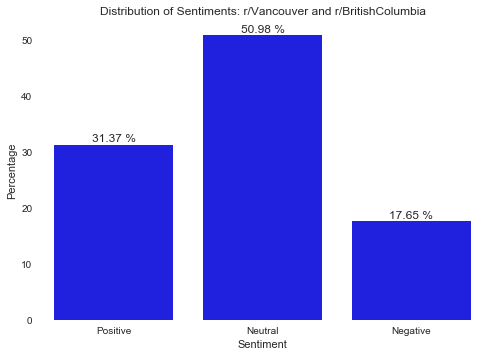

Total headers containing NDP or NDPs: 51


In [70]:
get_sentiment_party("Vancouver", "BritishColumbia", "NDP")

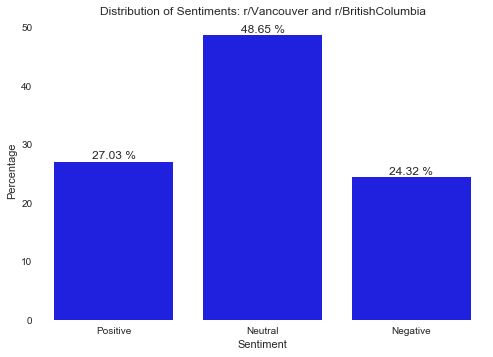

Total headers containing Liberal or Liberals: 74


In [71]:
get_sentiment_party("Vancouver", "BritishColumbia", "Liberal")

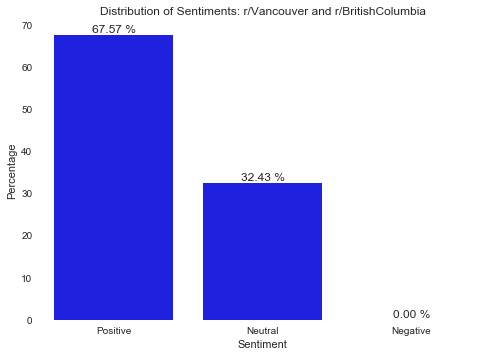

Total headers containing Green or Greens: 37


In [72]:
get_sentiment_party("Vancouver", "BritishColumbia", "Green")

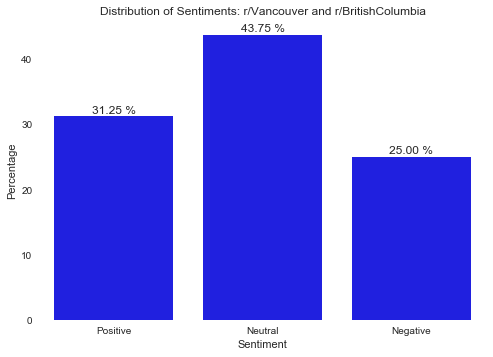

Total headers containing Clark: 32


In [77]:
get_sentiment_word("Vancouver", "BritishColumbia", "Clark")

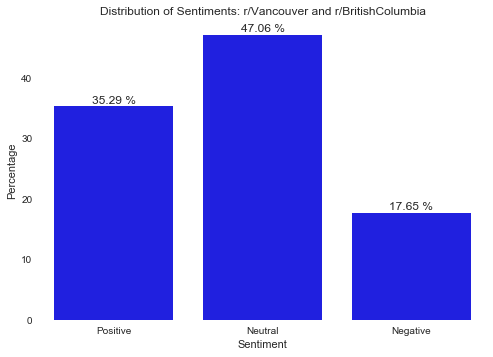

Total headers containing Horgan: 17


In [78]:
get_sentiment_word("Vancouver", "BritishColumbia", "Horgan")

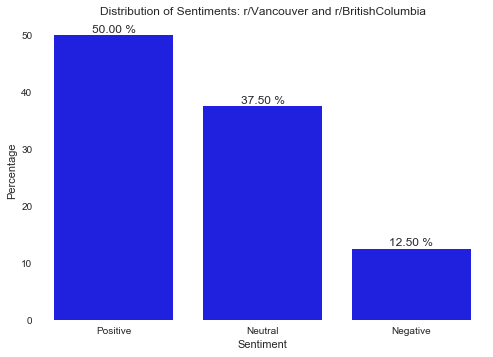

Total headers containing Weaver: 8


In [79]:
get_sentiment_word("Vancouver", "BritishColumbia", "Weaver")